# 베스트 모델 만들기 - 와인 사례
## 다중 분류
## 화이트 와인의 등급 맞추기

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
# 데이터 입력
df = pd.read_csv('../dataset/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
# 화이트 와인만 선택
df = df[df[12].isin([0])]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [15]:
df[11].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: 11, dtype: int64

In [16]:
dataset = df.values
X = dataset[:,0:11]
Y_tmp = dataset[:,11]

In [20]:
# One-hot-encoding
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y_tmp, 11)

In [21]:
Y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## 3개층(32, 24, 11)으로 한 경우

In [34]:
# 모델 설정
model = Sequential([
    Dense(32, input_dim=11, activation='relu'),
    Dense(24, activation='relu'),
    Dense(11, activation='softmax')
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_5 (Dense)              (None, 11)                275       
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [37]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "white{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [38]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [39]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 19.32936, saving model to ./model/white001-19.3294.hdf5

Epoch 00002: val_loss improved from 19.32936 to 15.60477, saving model to ./model/white002-15.6048.hdf5

Epoch 00003: val_loss improved from 15.60477 to 12.20475, saving model to ./model/white003-12.2048.hdf5

Epoch 00004: val_loss improved from 12.20475 to 8.83954, saving model to ./model/white004-8.8395.hdf5

Epoch 00005: val_loss improved from 8.83954 to 5.76611, saving model to ./model/white005-5.7661.hdf5

Epoch 00006: val_loss improved from 5.76611 to 2.78890, saving model to ./model/white006-2.7889.hdf5

Epoch 00007: val_loss improved from 2.78890 to 2.71872, saving model to ./model/white007-2.7187.hdf5

Epoch 00008: val_loss improved from 2.71872 to 2.43382, saving model to ./model/white008-2.4338.hdf5

Epoch 00009: val_loss improved from 2.43382 to 2.17984, saving model to ./model/white009-2.1798.hdf5

Epoch 00010: val_loss improved from 2.17984 to 1.60798, saving model to ./mo


Epoch 00116: val_loss did not improve from 1.11814

Epoch 00117: val_loss did not improve from 1.11814

Epoch 00118: val_loss improved from 1.11814 to 1.11766, saving model to ./model/white118-1.1177.hdf5

Epoch 00119: val_loss did not improve from 1.11766

Epoch 00120: val_loss did not improve from 1.11766

Epoch 00121: val_loss did not improve from 1.11766

Epoch 00122: val_loss did not improve from 1.11766

Epoch 00123: val_loss did not improve from 1.11766

Epoch 00124: val_loss did not improve from 1.11766

Epoch 00125: val_loss did not improve from 1.11766

Epoch 00126: val_loss did not improve from 1.11766

Epoch 00127: val_loss did not improve from 1.11766

Epoch 00128: val_loss did not improve from 1.11766

Epoch 00129: val_loss did not improve from 1.11766

Epoch 00130: val_loss did not improve from 1.11766

Epoch 00131: val_loss did not improve from 1.11766

Epoch 00132: val_loss did not improve from 1.11766

Epoch 00133: val_loss improved from 1.11766 to 1.11402, saving mo


Epoch 00273: val_loss did not improve from 1.07747

Epoch 00274: val_loss did not improve from 1.07747

Epoch 00275: val_loss did not improve from 1.07747

Epoch 00276: val_loss improved from 1.07747 to 1.07471, saving model to ./model/white276-1.0747.hdf5

Epoch 00277: val_loss improved from 1.07471 to 1.07023, saving model to ./model/white277-1.0702.hdf5

Epoch 00278: val_loss did not improve from 1.07023

Epoch 00279: val_loss did not improve from 1.07023

Epoch 00280: val_loss did not improve from 1.07023

Epoch 00281: val_loss did not improve from 1.07023

Epoch 00282: val_loss did not improve from 1.07023

Epoch 00283: val_loss did not improve from 1.07023

Epoch 00284: val_loss did not improve from 1.07023

Epoch 00285: val_loss did not improve from 1.07023

Epoch 00286: val_loss did not improve from 1.07023

Epoch 00287: val_loss did not improve from 1.07023

Epoch 00288: val_loss did not improve from 1.07023

Epoch 00289: val_loss did not improve from 1.07023

Epoch 00290: va


Epoch 00434: val_loss did not improve from 1.05793

Epoch 00435: val_loss did not improve from 1.05793

Epoch 00436: val_loss did not improve from 1.05793

Epoch 00437: val_loss did not improve from 1.05793

Epoch 00438: val_loss did not improve from 1.05793

Epoch 00439: val_loss did not improve from 1.05793

Epoch 00440: val_loss did not improve from 1.05793

Epoch 00441: val_loss did not improve from 1.05793

Epoch 00442: val_loss did not improve from 1.05793

Epoch 00443: val_loss improved from 1.05793 to 1.05747, saving model to ./model/white443-1.0575.hdf5

Epoch 00444: val_loss did not improve from 1.05747

Epoch 00445: val_loss did not improve from 1.05747

Epoch 00446: val_loss did not improve from 1.05747

Epoch 00447: val_loss did not improve from 1.05747

Epoch 00448: val_loss did not improve from 1.05747

Epoch 00449: val_loss did not improve from 1.05747

Epoch 00450: val_loss did not improve from 1.05747

Epoch 00451: val_loss did not improve from 1.05747

Epoch 00452: 


Epoch 00593: val_loss did not improve from 1.03850

Epoch 00594: val_loss did not improve from 1.03850

Epoch 00595: val_loss did not improve from 1.03850

Epoch 00596: val_loss did not improve from 1.03850

Epoch 00597: val_loss did not improve from 1.03850

Epoch 00598: val_loss did not improve from 1.03850

Epoch 00599: val_loss did not improve from 1.03850

Epoch 00600: val_loss did not improve from 1.03850

Epoch 00601: val_loss did not improve from 1.03850

Epoch 00602: val_loss did not improve from 1.03850

Epoch 00603: val_loss did not improve from 1.03850

Epoch 00604: val_loss did not improve from 1.03850

Epoch 00605: val_loss did not improve from 1.03850

Epoch 00606: val_loss did not improve from 1.03850

Epoch 00607: val_loss did not improve from 1.03850

Epoch 00608: val_loss did not improve from 1.03850

Epoch 00609: val_loss did not improve from 1.03850

Epoch 00610: val_loss did not improve from 1.03850

Epoch 00611: val_loss did not improve from 1.03850

Epoch 00612

In [42]:
del model
model = load_model('model/white724-1.0566.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

4898/4898 - 0s - loss: 1.1021 - accuracy: 0.5402

 Accuracy: 0.5402


In [43]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

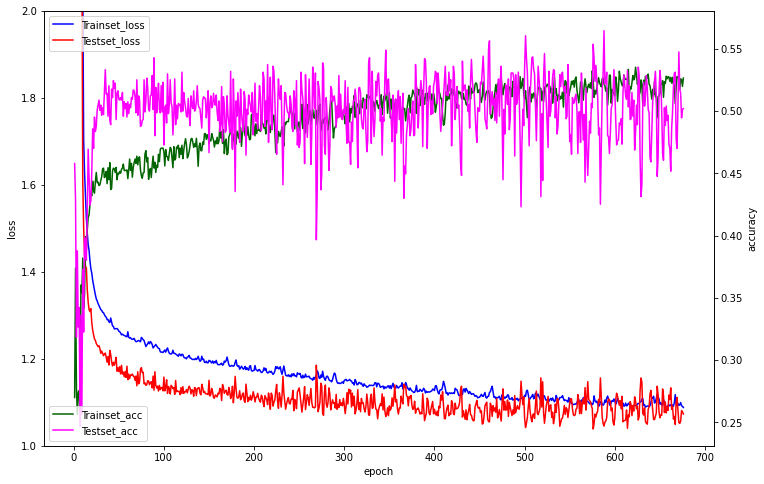

In [44]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()

#### 4개층(40, 24, 16, 11)으로 한 경우

In [19]:
# 모델 설정
model2 = Sequential([
    Dense(40, input_dim=11, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(11, activation='softmax')
]) 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                984       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 11)                187       
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 컴파일 
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "wcase2-{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [22]:
# 모델 실행 및 저장
history2 = model2.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback2])


Epoch 00001: val_loss improved from inf to 29.06378, saving model to ./model/wcase2-001-29.0638.hdf5

Epoch 00002: val_loss improved from 29.06378 to 17.72273, saving model to ./model/wcase2-002-17.7227.hdf5

Epoch 00003: val_loss improved from 17.72273 to 8.42983, saving model to ./model/wcase2-003-8.4298.hdf5

Epoch 00004: val_loss improved from 8.42983 to 3.59712, saving model to ./model/wcase2-004-3.5971.hdf5

Epoch 00005: val_loss improved from 3.59712 to 1.97276, saving model to ./model/wcase2-005-1.9728.hdf5

Epoch 00006: val_loss improved from 1.97276 to 1.71526, saving model to ./model/wcase2-006-1.7153.hdf5

Epoch 00007: val_loss improved from 1.71526 to 1.52074, saving model to ./model/wcase2-007-1.5207.hdf5

Epoch 00008: val_loss improved from 1.52074 to 1.39247, saving model to ./model/wcase2-008-1.3925.hdf5

Epoch 00009: val_loss improved from 1.39247 to 1.37988, saving model to ./model/wcase2-009-1.3799.hdf5

Epoch 00010: val_loss did not improve from 1.37988

Epoch 000


Epoch 00119: val_loss did not improve from 1.13292

Epoch 00120: val_loss did not improve from 1.13292

Epoch 00121: val_loss improved from 1.13292 to 1.12788, saving model to ./model/wcase2-121-1.1279.hdf5

Epoch 00122: val_loss did not improve from 1.12788

Epoch 00123: val_loss did not improve from 1.12788

Epoch 00124: val_loss did not improve from 1.12788

Epoch 00125: val_loss did not improve from 1.12788

Epoch 00126: val_loss did not improve from 1.12788

Epoch 00127: val_loss did not improve from 1.12788

Epoch 00128: val_loss did not improve from 1.12788

Epoch 00129: val_loss did not improve from 1.12788

Epoch 00130: val_loss did not improve from 1.12788

Epoch 00131: val_loss did not improve from 1.12788

Epoch 00132: val_loss did not improve from 1.12788

Epoch 00133: val_loss did not improve from 1.12788

Epoch 00134: val_loss did not improve from 1.12788

Epoch 00135: val_loss improved from 1.12788 to 1.12613, saving model to ./model/wcase2-135-1.1261.hdf5

Epoch 00136

Epoch 00264: val_loss did not improve from 1.06214

Epoch 00265: val_loss did not improve from 1.06214

Epoch 00266: val_loss did not improve from 1.06214

Epoch 00267: val_loss did not improve from 1.06214

Epoch 00268: val_loss did not improve from 1.06214

Epoch 00269: val_loss did not improve from 1.06214

Epoch 00270: val_loss did not improve from 1.06214

Epoch 00271: val_loss did not improve from 1.06214

Epoch 00272: val_loss did not improve from 1.06214

Epoch 00273: val_loss did not improve from 1.06214

Epoch 00274: val_loss did not improve from 1.06214

Epoch 00275: val_loss did not improve from 1.06214

Epoch 00276: val_loss did not improve from 1.06214

Epoch 00277: val_loss did not improve from 1.06214

Epoch 00278: val_loss did not improve from 1.06214

Epoch 00279: val_loss did not improve from 1.06214

Epoch 00280: val_loss did not improve from 1.06214

Epoch 00281: val_loss did not improve from 1.06214

Epoch 00282: val_loss did not improve from 1.06214

Epoch 00283:

Epoch 00428: val_loss did not improve from 1.04799

Epoch 00429: val_loss did not improve from 1.04799

Epoch 00430: val_loss did not improve from 1.04799

Epoch 00431: val_loss did not improve from 1.04799

Epoch 00432: val_loss did not improve from 1.04799

Epoch 00433: val_loss did not improve from 1.04799

Epoch 00434: val_loss did not improve from 1.04799

Epoch 00435: val_loss did not improve from 1.04799

Epoch 00436: val_loss did not improve from 1.04799

Epoch 00437: val_loss did not improve from 1.04799

Epoch 00438: val_loss did not improve from 1.04799

Epoch 00439: val_loss did not improve from 1.04799

Epoch 00440: val_loss did not improve from 1.04799

Epoch 00441: val_loss did not improve from 1.04799

Epoch 00442: val_loss did not improve from 1.04799

Epoch 00443: val_loss did not improve from 1.04799

Epoch 00444: val_loss did not improve from 1.04799

Epoch 00445: val_loss did not improve from 1.04799

Epoch 00446: val_loss did not improve from 1.04799

Epoch 00447:

In [23]:
del model2
model2 = load_model('model/wcase2-381-1.0480.hdf5')
print("\n Accuracy: %.4f" % (model2.evaluate(X, Y, verbose=2)[1]))

4898/1 - 0s - loss: 0.9577 - accuracy: 0.5157

 Accuracy: 0.5157


In [24]:
# 테스트셋
y_vloss = history2.history['val_loss']
y_vacc = history2.history['val_accuracy']
# 학습셋
y_loss = history2.history['loss']
y_acc = history2.history['accuracy']

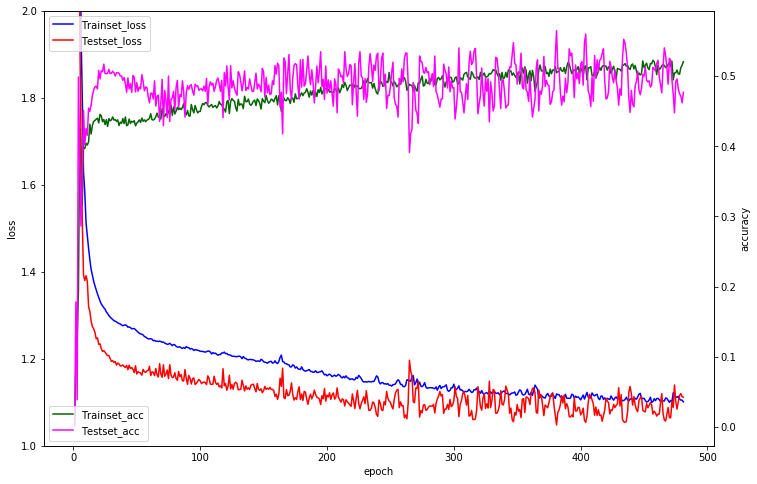

In [25]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()

## 2개층으로 한 경우(40, 11)

In [26]:
# 모델 설정
model3 = Sequential([
    Dense(40, input_dim=11, activation='relu'),
    Dense(11, activation='softmax')
]) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 11)                451       
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 컴파일 
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "wcase3-{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback3 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [29]:
# 모델 실행 및 저장
history3 = model3.fit(X, Y, validation_split=0.3, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback3])


Epoch 00001: val_loss improved from inf to 34.09764, saving model to ./model/wcase3-001-34.0976.hdf5

Epoch 00002: val_loss improved from 34.09764 to 22.95228, saving model to ./model/wcase3-002-22.9523.hdf5

Epoch 00003: val_loss improved from 22.95228 to 15.22897, saving model to ./model/wcase3-003-15.2290.hdf5

Epoch 00004: val_loss improved from 15.22897 to 10.84318, saving model to ./model/wcase3-004-10.8432.hdf5

Epoch 00005: val_loss improved from 10.84318 to 8.29358, saving model to ./model/wcase3-005-8.2936.hdf5

Epoch 00006: val_loss improved from 8.29358 to 7.24280, saving model to ./model/wcase3-006-7.2428.hdf5

Epoch 00007: val_loss improved from 7.24280 to 6.17413, saving model to ./model/wcase3-007-6.1741.hdf5

Epoch 00008: val_loss improved from 6.17413 to 4.58107, saving model to ./model/wcase3-008-4.5811.hdf5

Epoch 00009: val_loss improved from 4.58107 to 3.13371, saving model to ./model/wcase3-009-3.1337.hdf5

Epoch 00010: val_loss improved from 3.13371 to 1.93030,


Epoch 00115: val_loss did not improve from 1.12393

Epoch 00116: val_loss did not improve from 1.12393

Epoch 00117: val_loss did not improve from 1.12393

Epoch 00118: val_loss did not improve from 1.12393

Epoch 00119: val_loss did not improve from 1.12393

Epoch 00120: val_loss did not improve from 1.12393

Epoch 00121: val_loss did not improve from 1.12393

Epoch 00122: val_loss did not improve from 1.12393

Epoch 00123: val_loss did not improve from 1.12393

Epoch 00124: val_loss improved from 1.12393 to 1.11995, saving model to ./model/wcase3-124-1.1199.hdf5

Epoch 00125: val_loss did not improve from 1.11995

Epoch 00126: val_loss did not improve from 1.11995

Epoch 00127: val_loss did not improve from 1.11995

Epoch 00128: val_loss did not improve from 1.11995

Epoch 00129: val_loss did not improve from 1.11995

Epoch 00130: val_loss did not improve from 1.11995

Epoch 00131: val_loss did not improve from 1.11995

Epoch 00132: val_loss did not improve from 1.11995

Epoch 00133


Epoch 00274: val_loss did not improve from 1.07489

Epoch 00275: val_loss did not improve from 1.07489

Epoch 00276: val_loss did not improve from 1.07489

Epoch 00277: val_loss did not improve from 1.07489

Epoch 00278: val_loss did not improve from 1.07489

Epoch 00279: val_loss did not improve from 1.07489

Epoch 00280: val_loss did not improve from 1.07489

Epoch 00281: val_loss did not improve from 1.07489

Epoch 00282: val_loss did not improve from 1.07489

Epoch 00283: val_loss did not improve from 1.07489

Epoch 00284: val_loss did not improve from 1.07489

Epoch 00285: val_loss did not improve from 1.07489

Epoch 00286: val_loss did not improve from 1.07489

Epoch 00287: val_loss did not improve from 1.07489

Epoch 00288: val_loss did not improve from 1.07489

Epoch 00289: val_loss did not improve from 1.07489

Epoch 00290: val_loss did not improve from 1.07489

Epoch 00291: val_loss did not improve from 1.07489

Epoch 00292: val_loss did not improve from 1.07489

Epoch 00293


Epoch 00433: val_loss did not improve from 1.05926

Epoch 00434: val_loss did not improve from 1.05926

Epoch 00435: val_loss did not improve from 1.05926

Epoch 00436: val_loss did not improve from 1.05926

Epoch 00437: val_loss did not improve from 1.05926

Epoch 00438: val_loss did not improve from 1.05926

Epoch 00439: val_loss did not improve from 1.05926

Epoch 00440: val_loss improved from 1.05926 to 1.05795, saving model to ./model/wcase3-440-1.0580.hdf5

Epoch 00441: val_loss did not improve from 1.05795

Epoch 00442: val_loss did not improve from 1.05795

Epoch 00443: val_loss did not improve from 1.05795

Epoch 00444: val_loss did not improve from 1.05795

Epoch 00445: val_loss did not improve from 1.05795

Epoch 00446: val_loss did not improve from 1.05795

Epoch 00447: val_loss did not improve from 1.05795

Epoch 00448: val_loss did not improve from 1.05795

Epoch 00449: val_loss did not improve from 1.05795

Epoch 00450: val_loss did not improve from 1.05795

Epoch 00451

In [30]:
del model3
model3 = load_model('model/wcase3-465-1.0473.hdf5')
print("\n Accuracy: %.4f" % (model3.evaluate(X, Y, verbose=2)[1]))

4898/1 - 0s - loss: 0.9305 - accuracy: 0.5241

 Accuracy: 0.5241


In [31]:
# 테스트셋
y_vloss = history3.history['val_loss']
y_vacc = history3.history['val_accuracy']
# 학습셋
y_loss = history3.history['loss']
y_acc = history3.history['accuracy']

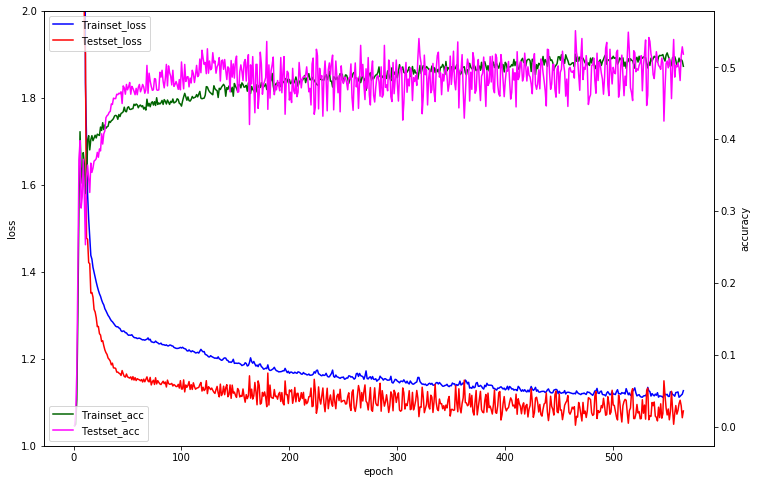

In [32]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylim([1,2])
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')
ax1.legend(loc='lower left')
plt.show()